# Распределение Парето
[wiki-link](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math as math
%matplotlib inline

создаем распределене Парето с параметрами К=6 Хm=1

In [2]:
K = 6.
Xm = 1.
par = sts.pareto(K,scale=Xm)

In [3]:
sample_1000 = par.rvs(1000)
min(sample_1000), max(sample_1000), len(sample_1000)

(1.0000361801566726, 3.5438794942973124, 1000)

Гистограмма выборки и теоретическая плотность вероятности распределения


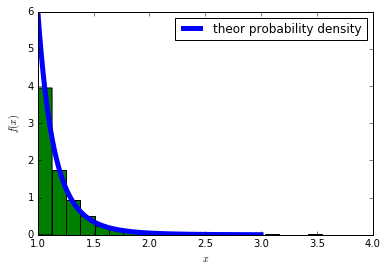

In [4]:
print("Гистограмма выборки и теоретическая плотность вероятности распределения")
x = np.linspace(1,3,1000)
pdf = par.pdf(x)
plt.plot(x, pdf, lw=5, label='theor probability density')
plt.hist(sample_1000, bins=20, normed=True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')

### среднее и дисперсия исходного распределения (из википедии)
 $$EX = (K * Xm)/(K-1)$$
 $$DX = ((Xm)/(k-1))^2*(k/(k-2))$$

In [5]:
EX = (K*Xm)/(K-1)
DX = ((Xm)/(K-1))*((Xm)/(K-1))*(K/(K-2))
print("EX: ", EX, " DX: ", DX)

('EX: ', 1.2, ' DX: ', 0.06000000000000001)


Генерируем по 1000 выборок длиной 5, 10, 50 элементов

In [6]:
samples_5 = []
samples_10 = []
samples_50 = []
for i in range(0,1001):
    samples_5.append(par.rvs(5))
    samples_10.append(par.rvs(10))
    samples_50.append(par.rvs(50))

Считаем среднее выборочное для сгенерированных выборок

In [7]:
mean_5 = []
mean_10 = []
mean_50 = []
for i in range(0, 1001):
    mean_5.append(np.mean(samples_5[i]))
    mean_10.append(np.mean(samples_10[i]))
    mean_50.append(np.mean(samples_50[i]))

Строим гистограммы для средних при разной длине выборки

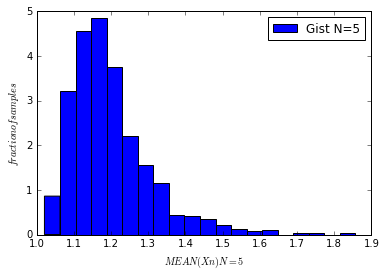

In [8]:
plt.hist(mean_5, bins=20, normed=True, label="Gist N=5")
plt.xlabel('$MEAN(Xn) N=5$')
plt.ylabel('$fraction of samples$')
plt.legend(loc='best')

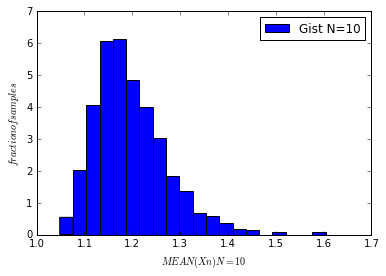

In [9]:
plt.hist(mean_10, bins=20, normed=True, label="Gist N=10")
plt.xlabel('$MEAN(Xn) N=10$')
plt.ylabel('$fraction of samples$')
plt.legend(loc='best')

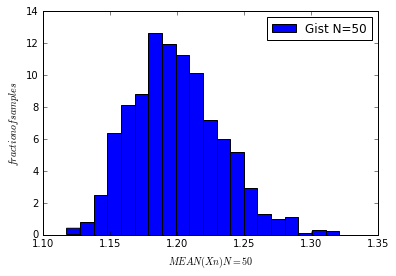

In [10]:
plt.hist(mean_50, bins=20, normed=True, label="Gist N=50")
plt.xlabel('$MEAN(Xn) N=50$')
plt.ylabel('$fraction of samples$')
plt.legend(loc='best')

Вычислим параметры нормального распределения которое апроксимирует выборочное среднее. Согласно ЦПТ
$$Xn=~N(EX, DX/n)$$
ЕХ берем из расчитанного по теории, DX расчитываем в зависимости от длины выборки.

In [11]:
DX_5 = DX/5
DX_10 = DX/10
DX_50 = DX/50
print("DX(N=5):", DX_5, "DX(N=10):", DX_10, "DX(N=50):", DX_50)

('DX(N=5):', 0.012000000000000002, 'DX(N=10):', 0.006000000000000001, 'DX(N=50):', 0.0012000000000000003)


In [12]:
x = np.linspace(0,2,1000)

Строим гистограмму выборочного среднего и апроксимирующее нормальное распределение с параметрами EX, sqrt(DX/N) для N=5

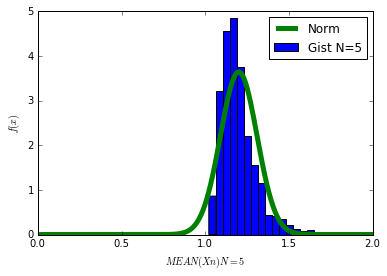

In [13]:
norm = sts.norm(loc=EX, scale=math.sqrt(DX_5))
pdf = norm.pdf(x)
plt.hist(mean_5, bins=20, normed=True, label="Gist N=5")
plt.xlabel('$MEAN(Xn) N=5$')
plt.ylabel('$f(x)$')
plt.plot(x, pdf, lw=5,label="Norm")
plt.legend(loc="upper right")

Строим гистограмму выборочного среднего и апроксимирующее нормальное распределение с параметрами EX, sqrt(DX/N) для N=10

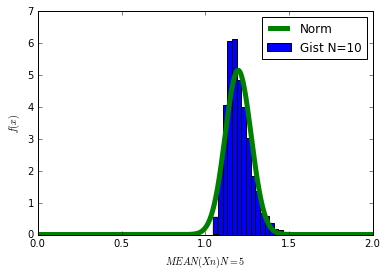

In [14]:
norm = sts.norm(loc=np.mean(mean_10), scale=math.sqrt(DX_10))
pdf = norm.pdf(x)
plt.hist(mean_10, bins=20, normed=True, label="Gist N=10")
plt.xlabel('$MEAN(Xn) N=5$')
plt.ylabel('$f(x)$')
plt.plot(x, pdf, lw=5,label="Norm")
plt.legend(loc="upper right")

Строим гистограмму выборочного среднего и апроксимирующее нормальное распределение с параметрами EX, sqrt(DX/N) для N=50

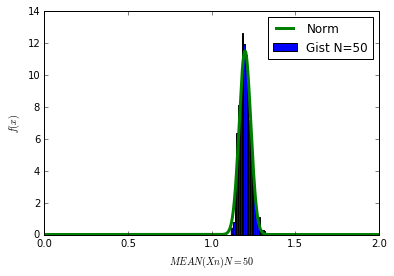

In [15]:
norm = sts.norm(loc=np.mean(mean_50), scale=math.sqrt(DX_50))
pdf = norm.pdf(x)
plt.hist(mean_50, bins=20, normed=True, label="Gist N=50")
plt.xlabel('$MEAN(Xn) N=50$')
plt.ylabel('$f(x)$')
plt.plot(x, pdf,lw=3, label="Norm")
plt.legend(loc="upper right")

### Итог:

При длине выборки равной 5 распределение выборочного среднего имеет выраженный асимметричный характер что плохо согласуется с нормальным распределением, так же для N=5 экспериментальное среднее расходится с средним в нормальном распределении вычисленным согласно ЦПТ. При N=10 асимметричность распределения выборочного среднего уменьшается но еще наблюдается. При N=50 распределение выборочного среднего хорошо согласуется с нормальным распределением согласно ЦПТ, таким образом можно утверждать что, длины выборки N=50 достаточно для получения хороших результатов апроксимации используя ЦПТ.